Dataset link - https://www.kaggle.com/datasets/kamleshsam/student-scores

In [23]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/ML L&T EduTech/Task-2/student_scores.csv', header=None)
df

,0,1
0,Hours,Scores
1,0,0
2,5.1,47
3,3.2,27
4,8.5,75
...,...,...
145,7.4,69
146,2.7,30
147,4.8,54
148,3.8,NaN


In [24]:
headers = ["Hours","Scores"]
df.columns=headers
df

,Hours,Scores
0,Hours,Scores
1,0,0
2,5.1,47
3,3.2,27
4,8.5,75
...,...,...
145,7.4,69
146,2.7,30
147,4.8,54
148,3.8,NaN


In [25]:
df["Scores"].isnull().value_counts()

False    132
True      18
Name: Scores, dtype: int64

In [26]:
missing_values=df.isnull()
missing_values.sum()

Hours      0
Scores    18
dtype: int64

In [27]:
df['Scores'].replace(np.NaN,inplace=True)

In [28]:
df["Scores"].isnull().sum()

0

In [29]:
df.to_csv('/content/drive/MyDrive/ML L&T EduTech/Task-2/cleaned_student_scores.csv')

In [32]:
df.dtypes

0    object
1    object
dtype: object

Predicted Exam Score for 9 hours of study: 81.61700386397948
Slope (Coefficient): 7.872419909313879
Intercept: 10.76522468015456
Accuracy: 1.0
F1 Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


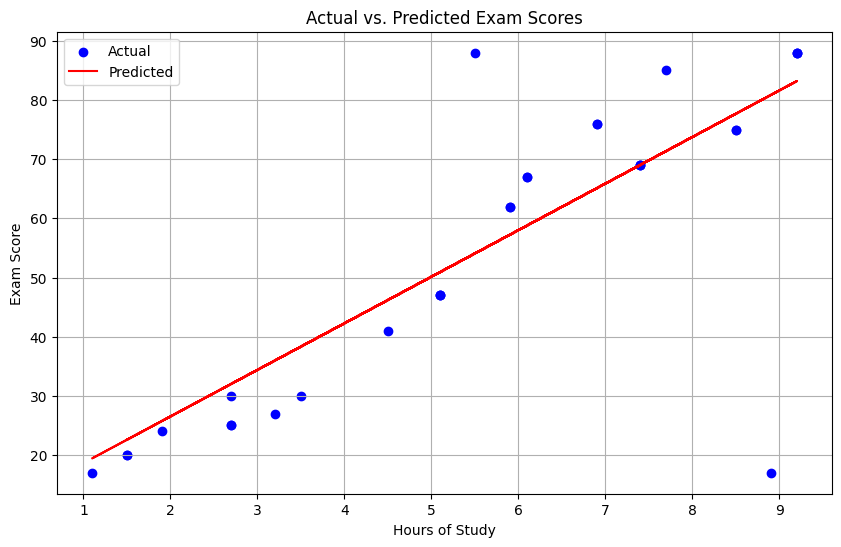

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score

# Load the student scores dataset
student_scores = pd.read_csv('/content/drive/MyDrive/ML L&T EduTech/Task-2/cleaned_student_scores.csv')

# Convert 'Hours' and 'Scores' columns to float
student_scores['Hours'] = pd.to_numeric(student_scores['Hours'], errors='coerce')
student_scores['Scores'] = pd.to_numeric(student_scores['Scores'], errors='coerce')

# Drop rows with NaN values
student_scores.dropna(inplace=True)

# Split the dataset into features (X) and target (y)
X = student_scores[['Hours']]
y = student_scores['Scores']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape study_hours for consistency
study_hours = X_train.values.reshape(-1, 1)

# Create the Linear regression model
model = LinearRegression()

# Train the model on the data
model.fit(study_hours, y_train)

# Make a prediction for a new student with 9 hours of study
new_hours = 9
predicted_score = model.predict([[new_hours]])

# Print the predicted score
print("Predicted Exam Score for 9 hours of study:", predicted_score[0])

# Print the coefficients (slope and intercept) of the fitted Line
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

# Convert regression predictions to binary classification predictions.
test_predictions_class = (model.predict(X_test) >= new_hours).astype(int)

# Calculate accuracy
accuracy = accuracy_score((y_test >= new_hours).astype(int), test_predictions_class)

# Calculate F1 score
f1 = f1_score((y_test >= new_hours).astype(int), test_predictions_class)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Plot actual vs. predicted scores
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, model.predict(X_test), color='red', label='Predicted')
plt.xlabel('Hours of Study')
plt.ylabel('Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.legend()
plt.grid(True)
plt.show()
